In [2]:
# Import required libraries:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset

df = pd.read_csv("dataset/loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# The dataset consists of 39717 rows and 111 columns
df.shape

(39717, 111)

In [5]:
# Checking information related to the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning:

In [6]:
# Finding the percentage of null or missing values from the dataset

df.isnull().mean() * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# Storing column names that contains more than 60% null values

null_cols = df.columns[(df.isnull().mean() * 100) >= 60].to_list()
null_cols

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [8]:
# Percentage of null values in null_cols:

df[null_cols].isnull().mean() * 100

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

Most of the columns contains 100% of missing or null values while, few columns have null or missing values more than 60% or 90%. Next step, drop these columns from the dataset as imputing those columns will exaggerate the dataset.

In [9]:
# Dropping the null columns
df.drop(null_cols, axis=1, inplace=True)

In [10]:
# Shape of dataset after removing the null or missing values
df.shape

(39717, 54)

After removing columns with more than 60% null values, the dataset has 54 columns. Next, lets drop these columns with least significance and having single value or category such as '0', 'INDIVIDUAL'.


In [11]:
df.drop(['id', 'member_id', 'emp_title', 'pymnt_plan','desc', 'url', 'title','revol_bal','initial_list_status',
        'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type',
        'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'recoveries'], axis=1, inplace=True)

In [12]:
# Shape of dataset:
df.shape

(39717, 28)

In [13]:
# Information of dataset columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [14]:
# Checking Null values present in the columns:
df.isnull().mean() * 100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.125891
total_acc               0.000000
total_pymnt             0.000000
total_pymnt_inv         0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

The columns emp_length, revol_util, pub_rec_bankruptcies have missing values. Lets, fill the missing values.

In [15]:
# 1. Checking missing values in `emp_length column`:
df.emp_length.isnull().sum()

1075

In [16]:
# Value count of the emp_length:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [17]:
# Imputing the values :
df.emp_length.fillna(df.emp_length.mode()[0], inplace=True)

In [18]:
# 2. Finding missing values in `revol_util column`:
df.revol_util.isnull().sum()

50

In [19]:
# Value count of the emp_length:
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [20]:
# Imputing the values:
df.revol_util.fillna(df.revol_util.mode()[0], inplace=True)

In [21]:
# 3. Finding missing values in `pub_rec_bankruptcies`:
df.pub_rec_bankruptcies.isnull().sum()

697

In [22]:
# Value count of pub_rec_bankruptcies column:
df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# Imputing the values :
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0], inplace=True)

In [24]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
total_pymnt             0
total_pymnt_inv         0
pub_rec_bankruptcies    0
dtype: int64

There are no null values in the dataset.

## Data Conversion and Manipulation:
To convert datatype of column into thier relevant datatypes.

In [25]:
# Data conversion:

df['term'] = df.term.apply(lambda x: int(x.rstrip(' months')))
df['int_rate'] = df.int_rate.apply(lambda x: float(x.rstrip('%')))
df['zip_code'] = df.zip_code.apply(lambda x: x[:3])


## Finding outliers:



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  int64  
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

In [27]:
# df.describe() method returns description of the data in the DataFrame.
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,22.088828,12153.596544,11567.149118,0.042501
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,11.401709,9042.040766,8942.672613,0.202603
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,13.000000,5576.930000,5112.310000,0.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,20.000000,9899.640319,9287.150000,0.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,29.000000,16534.433040,15798.810000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,58563.679930,58563.680000,2.000000


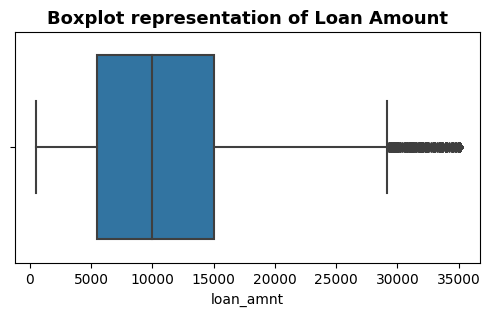

In [28]:
# Checking outliers in `loan_amnt` column:

plt.figure(figsize=(6,3))
sns.boxplot(x=df.loan_amnt)
plt.title('Boxplot representation of Loan Amount', fontsize=13, fontweight='bold')

plt.show()

In [29]:
# Removing the outliers:
df = df[df.loan_amnt <= df.loan_amnt.quantile(0.95)]

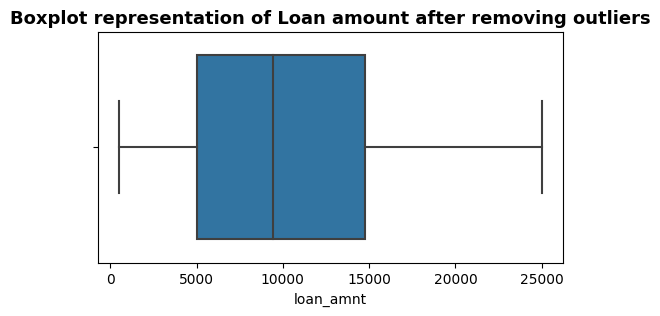

In [30]:
# After removing outliers from loan_amt column:

plt.figure(figsize=(6,3))
sns.boxplot(x =df.loan_amnt)
plt.title('Boxplot representation of Loan amount after removing outliers', fontsize=13, fontweight='bold')

plt.show()

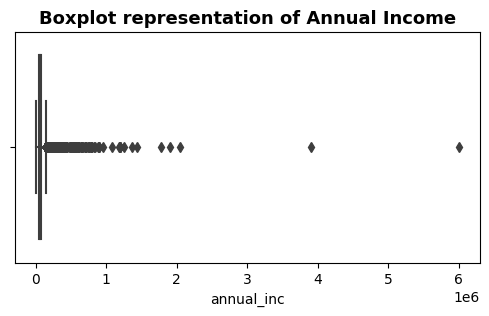

In [31]:
# 2. Checking outliers in `annual_inc` column:

plt.figure(figsize=(6,3))
sns.boxplot(x=df.annual_inc, color='brown')
plt.title('Boxplot representation of Annual Income', fontsize=13, fontweight='bold')

plt.show()

In [32]:
# Removing outliers from `annual_inc` column:
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

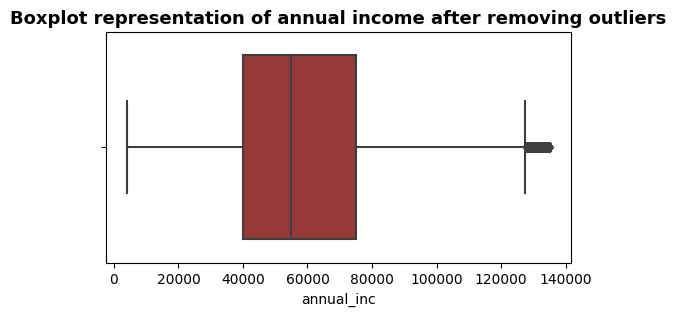

In [33]:
# After removing outliers:

plt.figure(figsize=(6,3))
sns.boxplot(x = df.annual_inc, color='brown')
plt.title('Boxplot representation of annual income after removing outliers', fontsize=13, fontweight='bold')

plt.show()

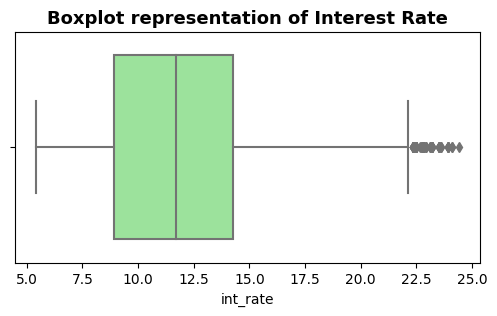

In [34]:
# 3. Finding outliers in `int_rate` column:

plt.figure(figsize=(6,3))
sns.boxplot(x = df.int_rate, color='lightgreen')
plt.title('Boxplot representation of Interest Rate', fontsize=13, fontweight='bold')

plt.show()

In [35]:
# Removing outliers:
df = df[df.int_rate <= df.int_rate.quantile(0.95)]

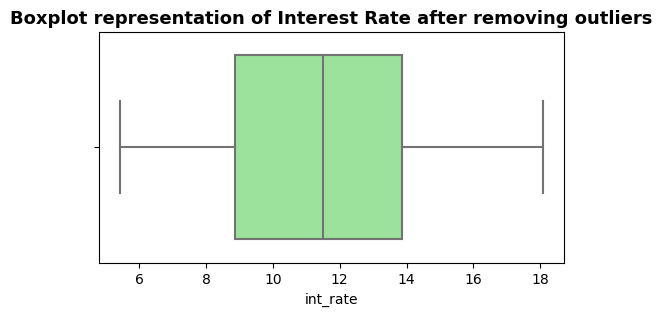

In [36]:
# After removing outliers:

plt.figure(figsize=(6,3))
plt.title('Boxplot representation of Interest Rate after removing outliers', fontsize=13, fontweight='bold')
sns.boxplot(x = df.int_rate, color='lightgreen')

plt.show()

## Data Analysis




### Univariate Analysis:

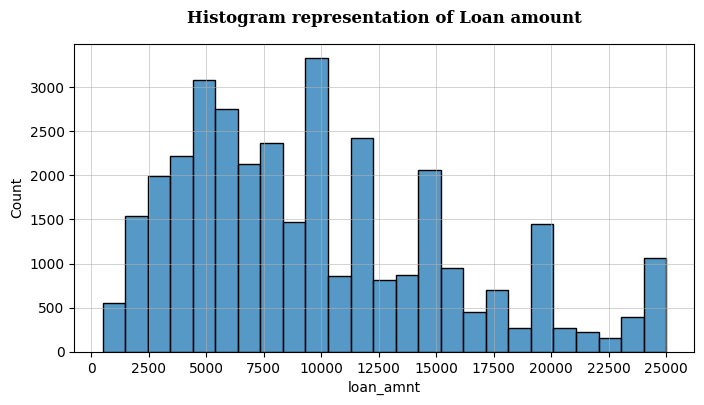

In [37]:
# Analysing `loan_amnt` i.e. Loan amount borrowed by the borrower:
plt.figure(figsize=(8,4))

sns.histplot(df.loan_amnt, bins=25).grid(lw=.4)
plt.title('Histogram representation of Loan amount',pad=15, fontname='serif', fontweight='bold')
plt.xticks(np.arange(0,26000,2500))

plt.show()

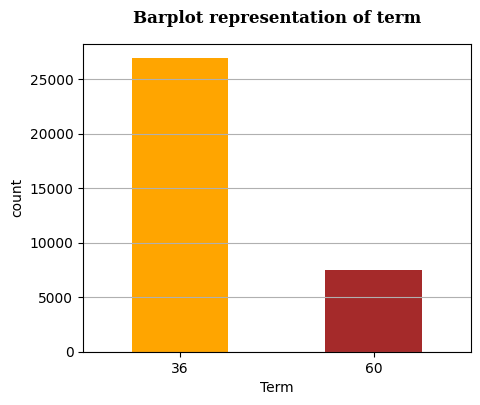

In [38]:
# Analysing `term` i.e. number of months to repay the loan:
plt.figure(figsize=(5,4))

ax= df['term'].value_counts().plot.bar(color=['orange','brown']).grid(axis='y')
plt.title('Barplot representation of term', pad=15, fontname='serif', fontweight='bold')
plt.xlabel('Term')
plt.ylabel('count')
plt.xticks(rotation=0)

plt.show()

Oservations:
- The number of borrowers who have taken the loan for a term of 36 months is quite high.

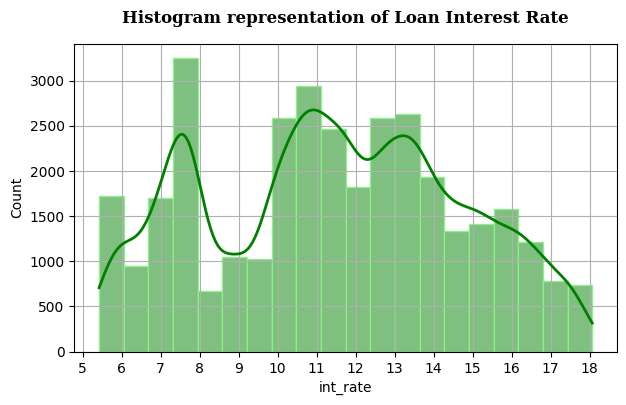

In [39]:
# Analysing `int_rate` i.e interest rate on loan:
plt.figure(figsize=(7,4))

sns.histplot(df.int_rate, bins=20, kde=True, color='green', ec='lightgreen',
                line_kws={'lw':2} ).grid()
plt.xticks(np.arange(5,19,1))
plt.title('Histogram representation of Loan Interest Rate', pad=15, fontname='serif', fontweight='bold')

plt.show()


Observation:
 - The count of borrowers id high between 7%-8% and 10%-14%.

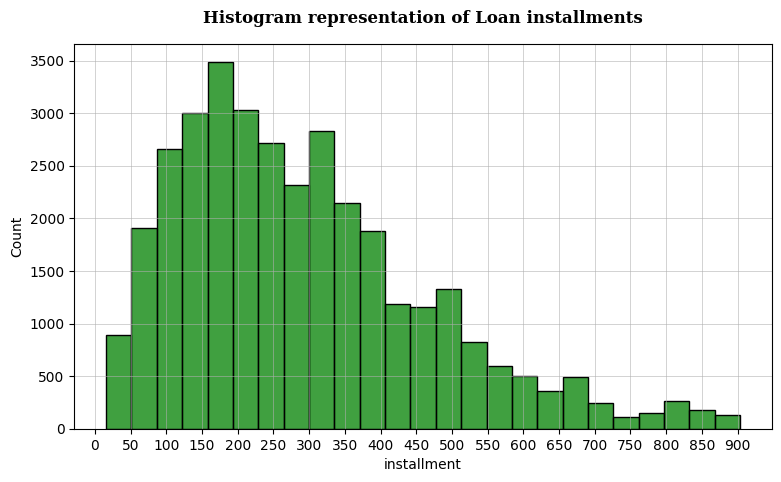

In [40]:
# Analysing `installment` on loan:
plt.figure(figsize=(9,5))

ax=sns.histplot(df.installment, bins=25, color='green').grid(lw=.4)
plt.title('Histogram representation of Loan installments', pad=15, fontname='serif', fontweight='bold')
plt.xticks(np.arange(0,950,50))

plt.show()

Observation:
- The number of borrowers is high for the installment range of 100-300.

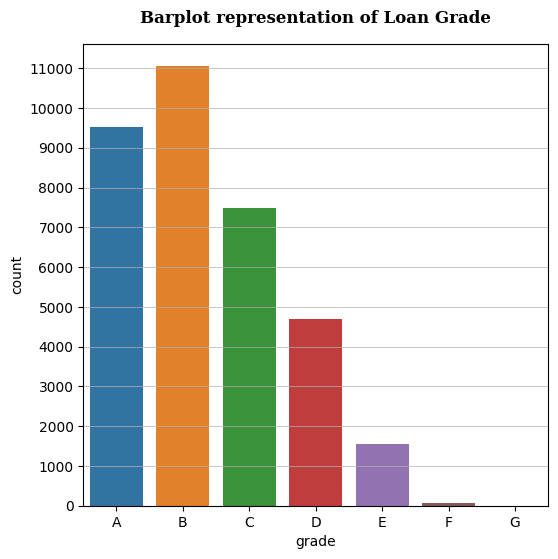

In [41]:
# Analysing `grade` i.e loan grade:
plt.figure(figsize=(6,6))

sns.countplot(data=df, x='grade', order=['A','B','C','D','E','F','G']).grid(axis='y', linewidth=0.5)
plt.yticks(np.arange(0,12000,1000))
plt.title('Barplot representation of Loan Grade', fontname='serif', pad=15, fontweight='bold')

plt.show()

Oservation:
- Grade B loans have a higher count of borrowers, i.e. around 11000.
- Grade A loans have borrower count between 9000 -10000.
- Loan applicants with grade A and B are likely to be approved.

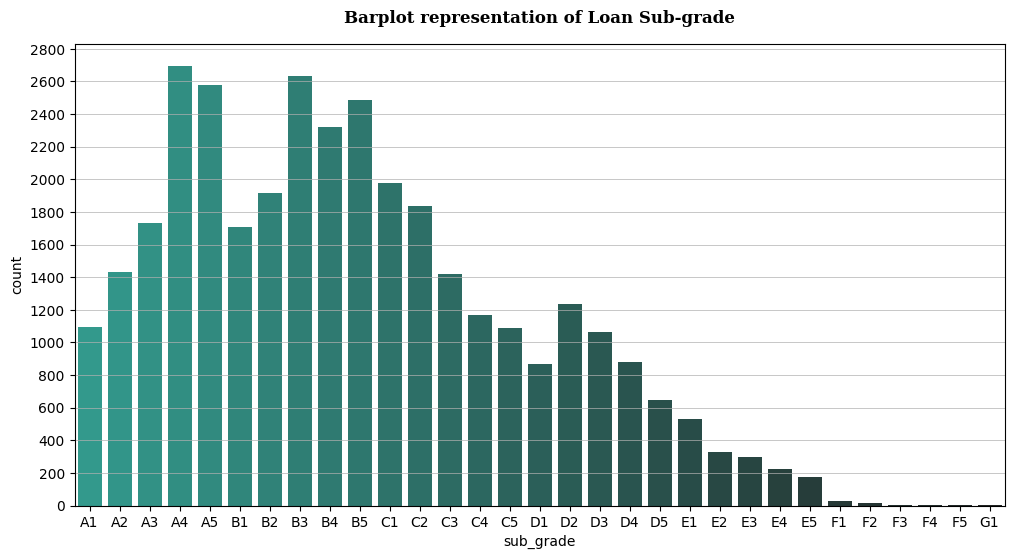

In [42]:
# Analysing `sub-grade` i.e loan sub-grade:
plt.figure(figsize=(12,6))

sns.countplot(data=df, x='sub_grade', palette="dark:#2A9_r",
              order=['A1', 'A2','A3', 'A4','A5', 'B1','B2','B3','B4','B5', 'C1','C2', 'C3','C4', 'C5', 'D1',
        'D2', 'D3', 'D4', 'D5', 'E1','E2', 'E3','E4','E5',  'F1', 'F2', 'F3', 'F4', 'F5', 'G1']).grid(axis='y', linewidth=0.5)

plt.yticks(np.arange(0,3000,200))
plt.title('Barplot representation of Loan Sub-grade', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observation:
 -  Loans of subgrade A4, and A5 have a high count of borrowers, i.e. between the range 2400-2800.
 - Loans having subgrade B3, B4, and B5 also have a high count of borrowers between the range 2200-2700.
 - So, Loan applicants with subgrades A4, A5, B3, B4, and B5 are more likely to be approved for a loan.

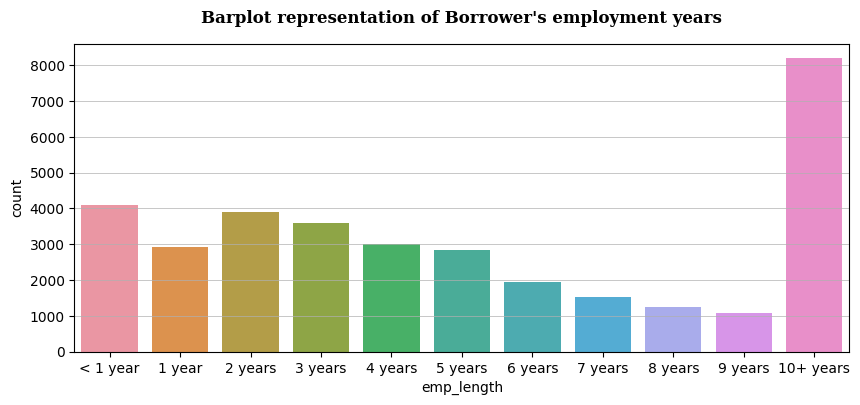

In [43]:
# Analysing `emp_length` i.e employment years of loan applicant:
plt.figure(figsize=(10,4))

sns.countplot(data=df, x='emp_length',
              order=[ '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
        '6 years',  '7 years', '8 years', '9 years', '10+ years']).grid(axis='y', linewidth=0.5)

plt.title('Barplot representation of Borrower\'s employment years', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
- Borrowers with 10+ years of employment have a high count.
- While borrowers with employment of 9 years have low count.
-  Borrowers with 10+ years of employment have a higher chance of approval.

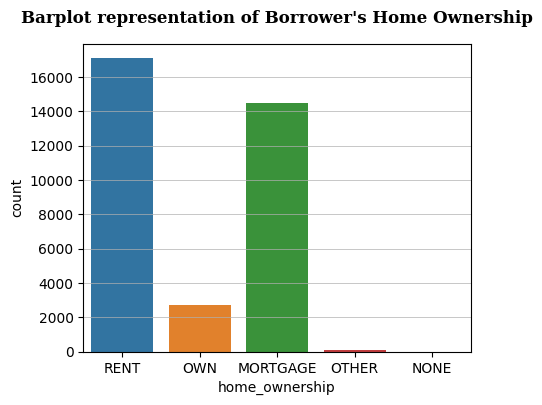

In [44]:
# Analysing `home_ownership` i.e home ownership of loan applicant:
plt.figure(figsize=(5,4))

sns.countplot(data=df, x='home_ownership', ).grid(axis='y', linewidth=0.5)
plt.title('Barplot representation of Borrower\'s Home Ownership', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
- Borrowers with Rent or Mortgage home have higher chances of loan approval.

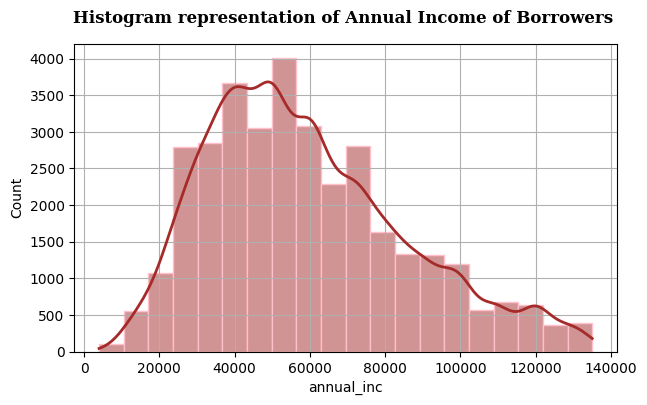

In [45]:
# Analysing `annual_inc` i.e  annual income of loan applicant:
plt.figure(figsize=(7,4))

ax=sns.histplot(df.annual_inc, bins=20, kde=True, color='brown', ec='pink',
                line_kws={'lw':2} ).grid()
plt.title('Histogram representation of Annual Income of Borrowers ', pad=15, fontname='serif', fontweight='bold')

plt.show()


- The borrower count is high for annual income ranging between 35000 - 60000.
- So, applicant having annual income between 35k - 60k have high possibility of loan approval.

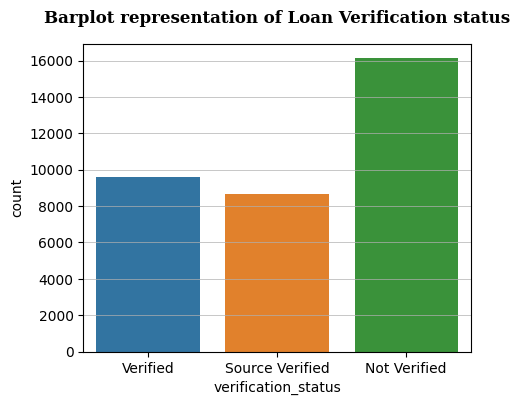

In [46]:
# Analysing `verification_status` i.e loan source verification:
plt.figure(figsize=(5,4))

sns.countplot(data=df, x='verification_status').grid(axis='y', linewidth=0.5)
plt.title('Barplot representation of Loan Verification status', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
 -
 Over 16000 borrowers didn't have their loan verified, which might increase the risk of defaulting.

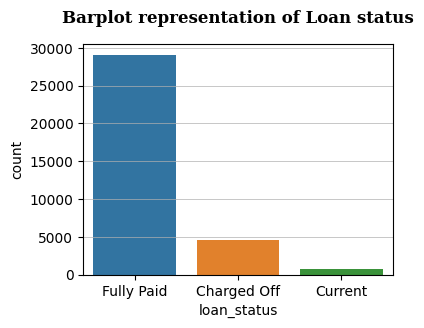

In [47]:
# Analysing `loan_status` i.e loan status applicant:
plt.figure(figsize=(4,3))

sns.countplot(data=df, x='loan_status').grid(axis='y', linewidth=0.5)
plt.title('Barplot representation of Loan status', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
- The count of Fully Paid loans is quite high than Charged Off and Current active loans.

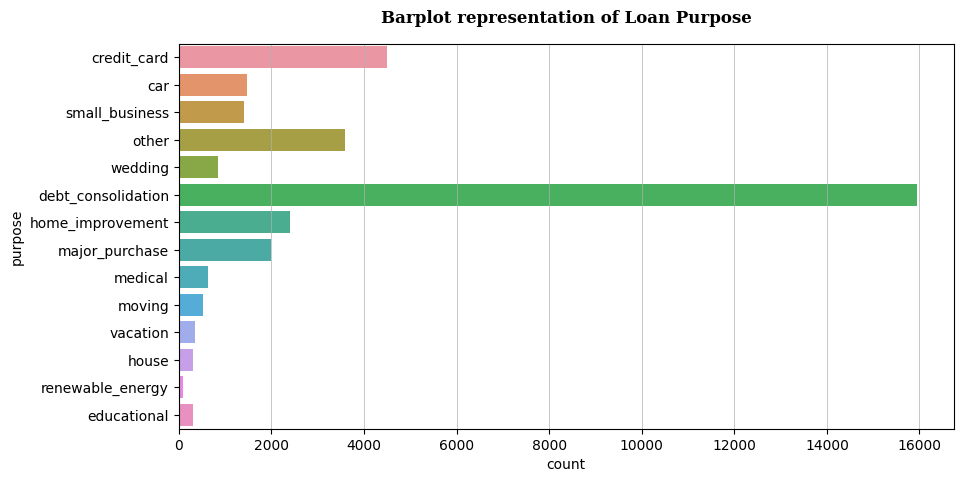

In [48]:
# Analysing `purpose` i.e purpose for applying loan:
plt.figure(figsize=(10,5))

sns.countplot(data=df, y='purpose').grid(axis='x', linewidth=0.5)
plt.title('Barplot representation of Loan Purpose', fontname='serif', pad=15, fontweight='bold')

plt.show()

Oservation:
- The count of borrowers who have taken loans for debt consolidation is quite high, around 16000.
- The number of borrowers who have taken out loans for credit card debt exceeds 4000.

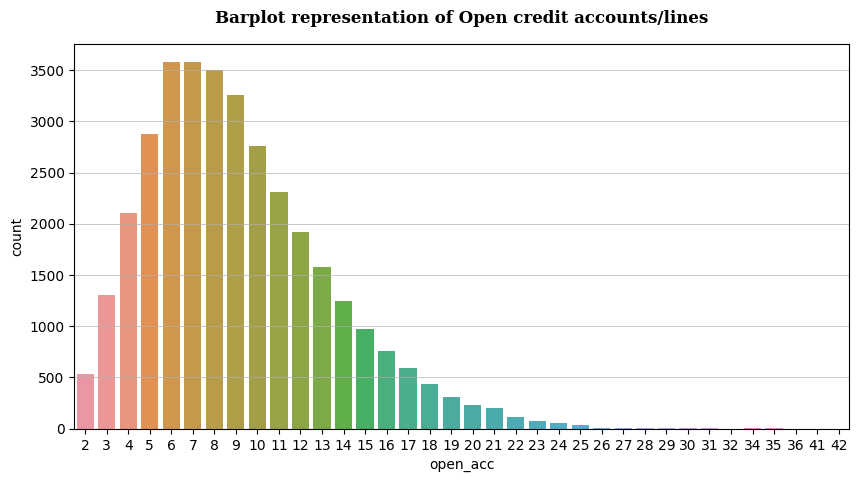

In [49]:
# Analysing `open_acc` i.e number of credit lines open by borrower:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='open_acc').grid(axis='y', linewidth=0.5)
plt.title('Barplot representation of Open credit accounts/lines', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observations:
- The borrowers count is high for borrower with open accounts between 6-9 i.e above 3000.

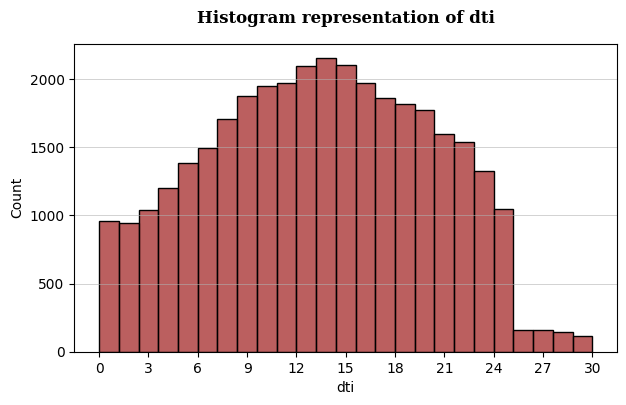

In [50]:
# Analysing `dti` i.e ratio calculated using the borrower’s total monthly debt payments on the total debt obligations,
# excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
plt.figure(figsize=(7,4))

ax=sns.histplot(df.dti, bins=25, color='brown').grid(axis='y',  lw=0.4)
plt.title('Histogram representation of dti', fontname='serif', pad=15, fontweight='bold')
plt.xticks(np.arange(0,31,3))

plt.show()

Observation:
- Borrowers having loans with dti from 12 - 15 are higher in the count.
- The count of borrowers decreases as the dti goes below 12 or beyond 15.

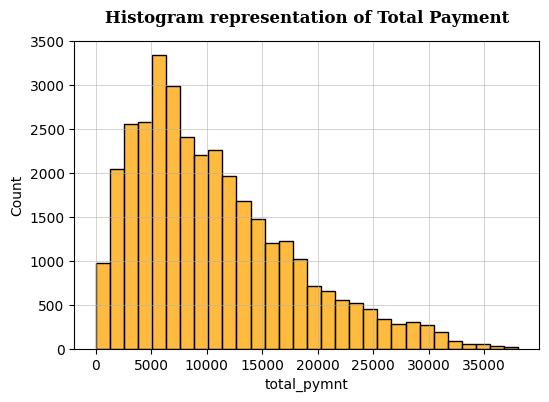

In [51]:
# Analysing `total_pymnt` i.e Payments received to date for total amount funded:
plt.figure(figsize=(6,4))

sns.histplot(df.total_pymnt, bins=30, color='orange').grid( lw=0.4)
plt.title('Histogram representation of Total Payment',fontname='serif', pad=13, fontweight='bold')

plt.show()

Observation:
- The total payment between 5000-7500 has a higher number of borrowers.
- As the total payment increases the number of borrowers who made total payment decreases.

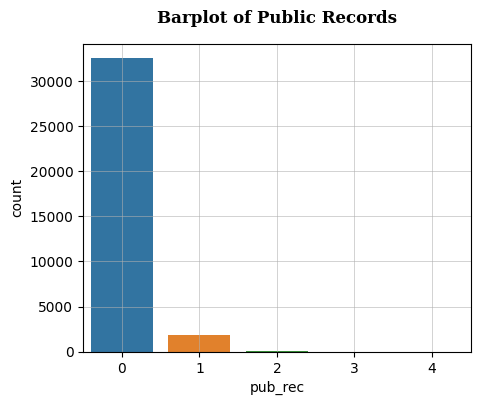

In [52]:
# Analysing `pub_rec` i.e Number of derogatory public records:
plt.figure(figsize=(5,4))

sns.countplot(data=df, x='pub_rec').grid(lw=.4)
plt.title('Barplot of Public Records', fontname='serif',pad=15, fontweight='bold')

plt.show()

Observation:
- The number of borrowers having derogatory public records as 0 is higher.
- The visualization indicates that applicants with 0 derogatory public records have a higher chance of loan approval.


### Bivariate Analysis:

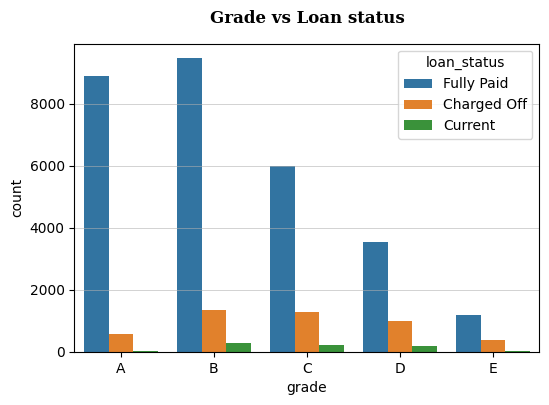

In [53]:
# Analysing grade vs loan_status:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='grade', hue='loan_status', order=['A','B','C','D','E']).grid(axis='y',  lw=0.4)
plt.title('Grade vs Loan status', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observation:
- Grade A and B have a higher count of 'Fully Paid' and 'Charged Off' borrowers compared to Grade E has a lower count of 'Fully Paid' and 'Charged Off' applicants.
- So, it can be inferred that borrowers with loan grades A and B are less likely to default.

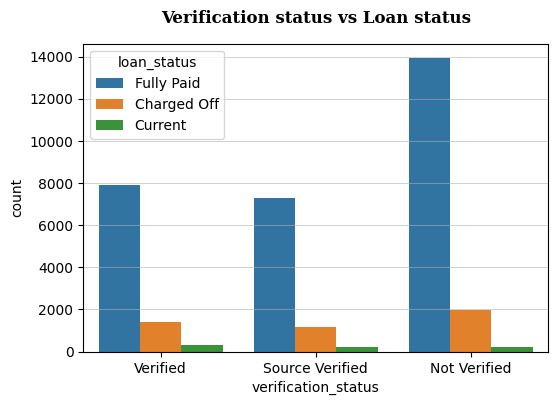

In [54]:
# Analysing verification_status vs loan_status:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='verification_status', hue='loan_status').grid(axis='y',  lw=0.4)
plt.title('Verification status vs Loan status', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observation:
- The count of Charged Off borrowers is higher for those with unverified income sources compared to verified or source verified borrowers, even though the count of Fully Paid borrowers is also high for those who are not verified.

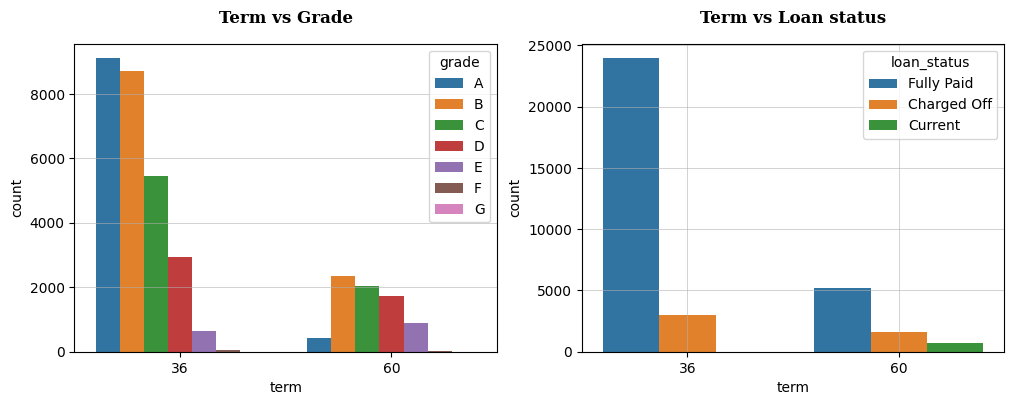

In [55]:
# Analysing term vs grade and loan_status:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

# Subplot 1: Analysing term vs grade:
sns.countplot(data=df, x='term', hue='grade', hue_order=['A','B','C','D','E','F','G'], ax=ax[0]).grid(axis='y', lw=.4)
ax[0].set_title('Term vs Grade', fontname='serif', pad=15, fontweight='bold')

# Subplot 2: Analysing term vs loan_status:
sns.countplot(data=df, x='term', hue='loan_status', ax=ax[1]).grid(lw=.4)
ax[1].set_title('Term vs Loan status', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observation:
- In first subplot i.e. term vs grade , for term as 36 months, applicants of loan grade A and B are more and for term as 60 months , applicants of loan grade B,C and D are higher.
- In second subplot i.e. term vs loan_status , for term as 36 months, there are higher number of applicants who have 'Fully Paid' the loan amount.

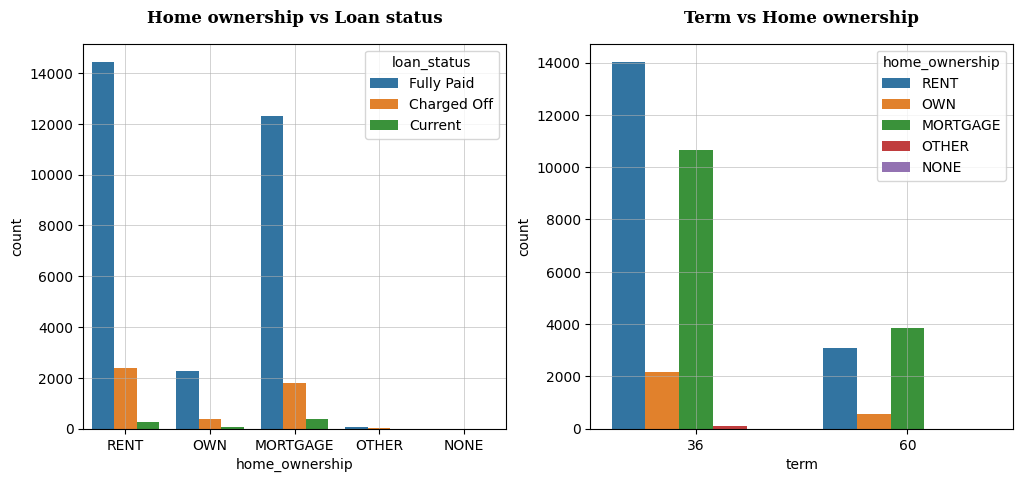

In [56]:
# Analysing home_ownership with loan_status and verification_status:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.countplot(data=df, x='home_ownership',  hue='loan_status', ax=ax[0]).grid(lw=0.4)
ax[0].set_title('Home ownership vs Loan status', fontname='serif', pad=15, fontweight='bold')

sns.countplot(data=df, x='term', hue='home_ownership', ax=ax[1]).grid(lw=0.4)
ax[1].set_title('Term vs Home ownership', fontname='serif', pad=15,  fontweight='bold')

plt.show()

Observations:
- Rent and Mortgage have high rate of Fully paid borrowers compared with it defaulters rate is low.
- Majority of the borrowers who have Home ownership as Rent and Mortgage have loan term of 36 months.

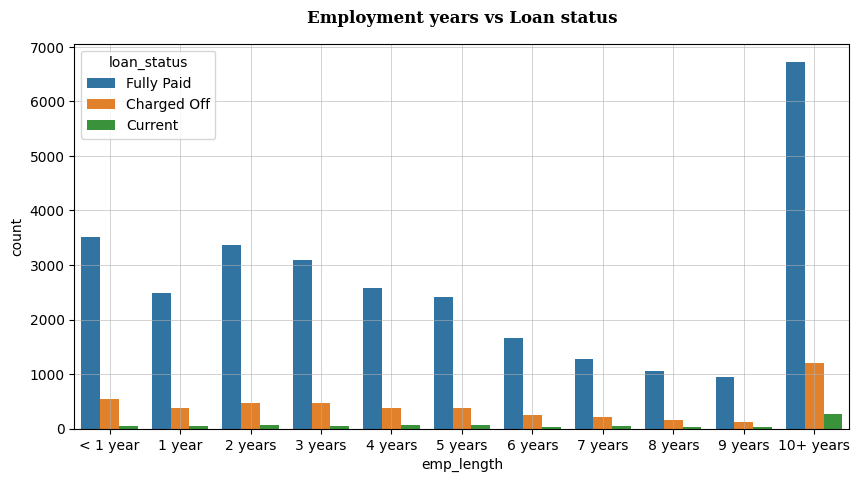

In [57]:
# Analysing emp_length vs loan_status:
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='emp_length', hue='loan_status',
              order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years','9 years','10+ years']
              ).grid(lw=0.4)

plt.title('Employment years vs Loan status', fontname='serif', pad=15,  fontweight='bold')

plt.show()

Observation:
- Borrowers with 10+ years of Employment years are very high in count. Also, it has high count of Fully Paid borrowers.
- Hence, applicant with 10+ employment years have higher chance of loan approval.

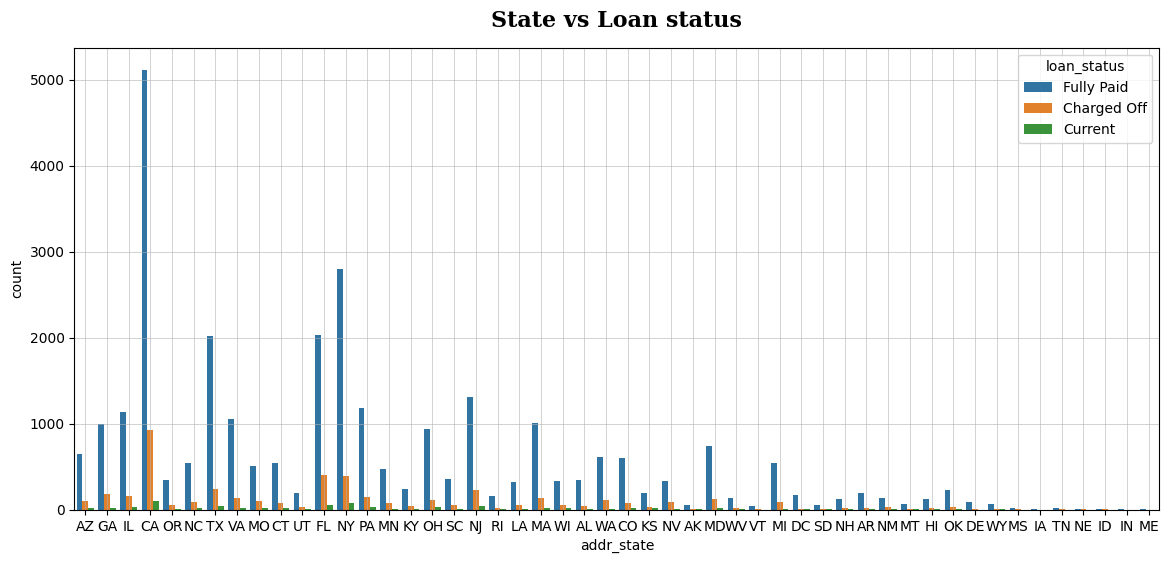

In [58]:
# Analysing addr_state vs loan_status:
plt.figure(figsize=(14,6))

sns.countplot(data=df, x='addr_state', hue='loan_status').grid(lw=0.4)
plt.title('State vs Loan status', fontname='serif', pad=15, fontsize=16,  fontweight='bold')

plt.show()

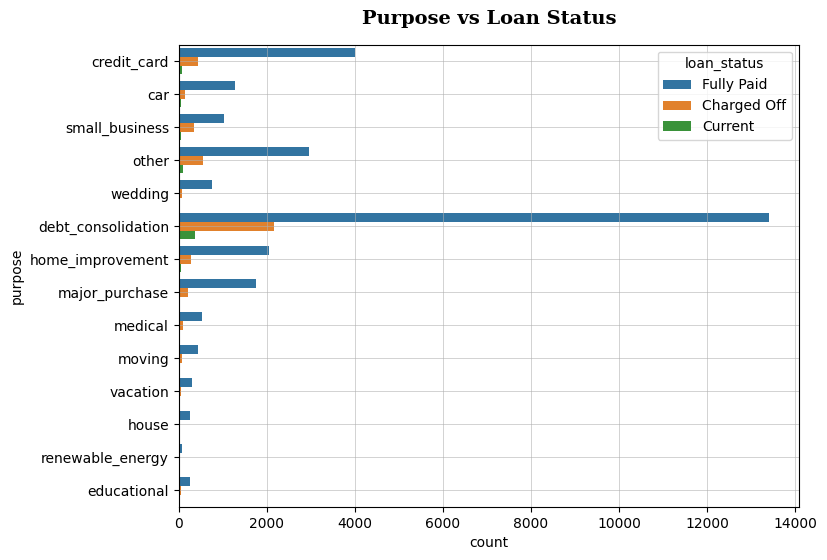

In [59]:
# Analysing purpose vs loan_status:
plt.figure(figsize=(8,6))

sns.countplot(data=df, y='purpose', hue='loan_status').grid(lw=.4)
plt.title('Purpose vs Loan Status', fontsize=14, fontname='serif', pad=15,  fontweight='bold')

plt.show()

Observations:
- The loan borrowers count for Debt Consolidation is high.
- The rate of Fully Paid and Charged Off is also high compared to other loan purpose. But, count of Charged Off very less compared to the count of Fully Paid borrowers.

In [60]:
# Converting numerical column 'int_rate' into Categorical column by binning the column:

df['intRate_batches'] = pd.qcut(df.int_rate, [0,0.2,0.4,0.6,0.8,1],
                               ['5%-7.9%','7.9%-10.5%','10.5%-12.9%','12.9%-15.5%','15.5%-18.0%'])

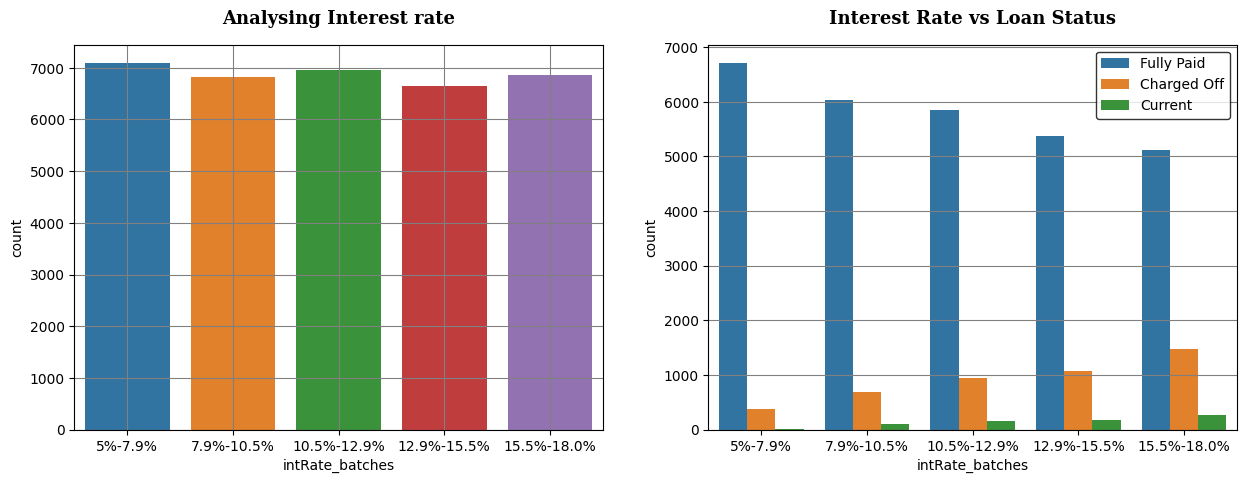

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))


# Subplot 1: Analysing int_rate batches:
sns.countplot(data=df, x='intRate_batches', ax=ax[0]).grid(c='gray')
ax[0].set_title('Analysing Interest rate',  fontweight='bold', pad=15, fontsize=13, fontname='serif')


# Subplot 2: Analysing int_rate_batches vs loan_status:
ax[1].grid(c='gray')
sns.countplot(data=df, x='intRate_batches', hue='loan_status', ax=ax[1]).legend(loc='upper right', frameon=True,
                                                                              edgecolor='black', facecolor='white', bbox_to_anchor=(1,1))
ax[1].set_title('Interest Rate vs Loan Status',  fontweight='bold', pad=15, fontsize=13, fontname='serif')


plt.show()

Observation:
- Analysing **Interest rate** shows **5%-7.9%** and **10.5%-12.9%** has more loan borrowers.
- While analysing **Interest rate vs Loan status**, as the interest rate increases the count of **Fully paid** decreases and **Charged Off** increases.

In [62]:
# Converting numerical column 'dti' into Categorical column by binning the column:

df['dti_batches'] = pd.cut(df.dti, bins=5, labels=['0-6', '6-12', '12-18', '18-24','24-30'])

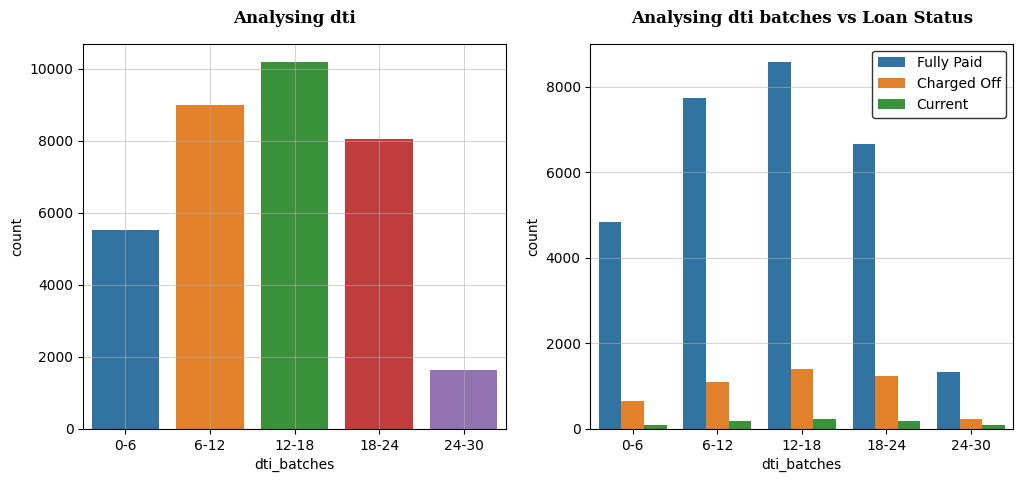

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))


# Subplot 1: Analysing dti_batches:
sns.countplot(data=df, x='dti_batches', ax=ax[0]).grid(lw=.4)
ax[0].set_title('Analysing dti',  fontweight='bold', pad=15, fontname='serif')


# Subplot 2: Analysing dti batches vs Loan Status:
ax[1].grid(lw=.4)
sns.countplot(data=df, x='dti_batches', hue='loan_status', ax=ax[1]).legend(frameon=True,edgecolor='black', facecolor='white')
ax[1].set_title('Analysing dti batches vs Loan Status',  fontweight='bold', pad=15, fontname='serif')


plt.show()

Observation:
- The dti batch 12-18 and 6-12 have higher count of borrowers.
- When dti compared with Loan Status, the dti batches  12-18 and 6-12 have highest count of Fully Paid borrowers

In [64]:
# Converting numerical column 'loan_amnt' into Categorical column by binning the column:

df['loan_amnt_batches'] = pd.cut(df.loan_amnt, bins=5, labels=['500-5400','5400-10300', '10300-15200', '15200-20100', '20100-25000'])

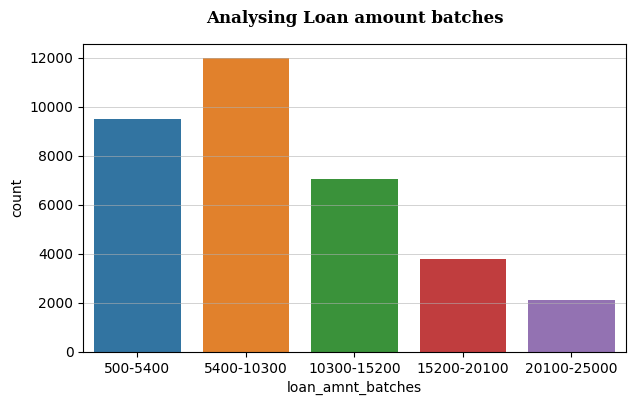

In [65]:
# Analysing 'loan_amnt_batches' column:

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='loan_amnt_batches').grid(axis='y', lw=.4)
plt.title('Analysing Loan amount batches',  fontweight='bold', pad=15, fontname='serif')
plt.show()

Observations:
- The batch of borrowers having income between 5400-10300 have high count.

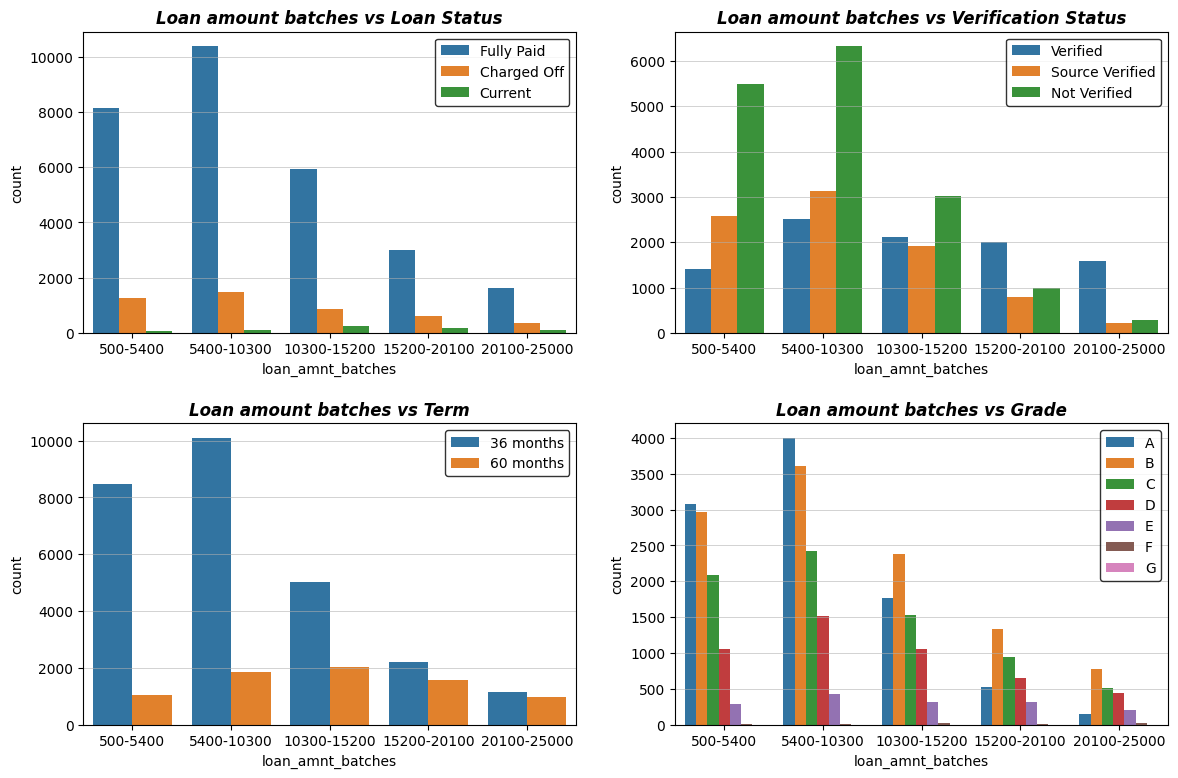

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(14,9))
plt.subplots_adjust(hspace=0.3, wspace=0.2)

# Subplot 1: Analysing loan_amnt_batches vs loan_status
ax[0,0].grid(lw=.4)
sns.countplot(data=df, x='loan_amnt_batches', hue='loan_status', ax=ax[0,0]).legend(loc='upper right', frameon=True,
                                                                              edgecolor='black', facecolor='white', bbox_to_anchor=(1,1))
ax[0,0].set_title('Loan amount batches vs Loan Status',  fontweight='bold', fontstyle='oblique')


# Subplot 2: Analysing loan_amnt_batches vs verification_status
ax[0,1].grid(lw=.4)
sns.countplot(data=df, x='loan_amnt_batches', hue='verification_status', ax=ax[0,1]).legend(frameon=True, edgecolor='black', facecolor='white', bbox_to_anchor=(1,1))
ax[0,1].set_title('Loan amount batches vs Verification Status',  fontweight='bold', fontstyle='oblique')

# Subplot 3: Analysing loan_amnt_batches vs term
ax[1,0].grid(lw=.4)
sns.countplot(data=df, x='loan_amnt_batches', hue='term', ax=ax[1,0]).legend(frameon=True, labels=['36 months', '60 months'],
                                                                              edgecolor='black', facecolor='white',  bbox_to_anchor=(1,1))
ax[1,0].set_title('Loan amount batches vs Term',  fontweight='bold', fontstyle='oblique')


# Subplot 4: Analysing loan_amnt_batches vs grade
ax[1,1].grid(lw=.4)
sns.countplot(data=df, x='loan_amnt_batches', hue='grade', ax=ax[1,1], hue_order=['A','B','C','D','E','F','G']).legend(frameon=True,
                                                                              edgecolor='black', facecolor='white', bbox_to_anchor=(1,1))
ax[1,1].set_title('Loan amount batches vs Grade',  fontweight='bold', fontstyle='oblique')


plt.show()

Observations:

- From the above analysis, subplot 1 shows loan amount ranging from 500 - 10300 have higher number of borrowers.
- From the subplot 2, analysis of Loan amount batches vs Verification Status states that the brrowers issuing loan amount from 500 -10300, most of the borrower dont have their loan source verified.
- From subplot 3, analysis of Loan amount batches vs Term  shows loan amount ranging from 500 - 10300 have high count of **Fully paid** borrowers while for loan amount ranging between 5400-15200 have high count of **defaulters**.
- From subplot 4, analysis of Loan amount batches vs Grade, every group of loan amount have high count of borrowers with loan of **grade B**.






In [67]:
# Converting numerical column 'installment' into Categorical column by binning the column:

df['installment_batches'] = pd.cut(df.installment, bins=5, labels=['15-193', '193-371', '371-549','549-727','727-905'])

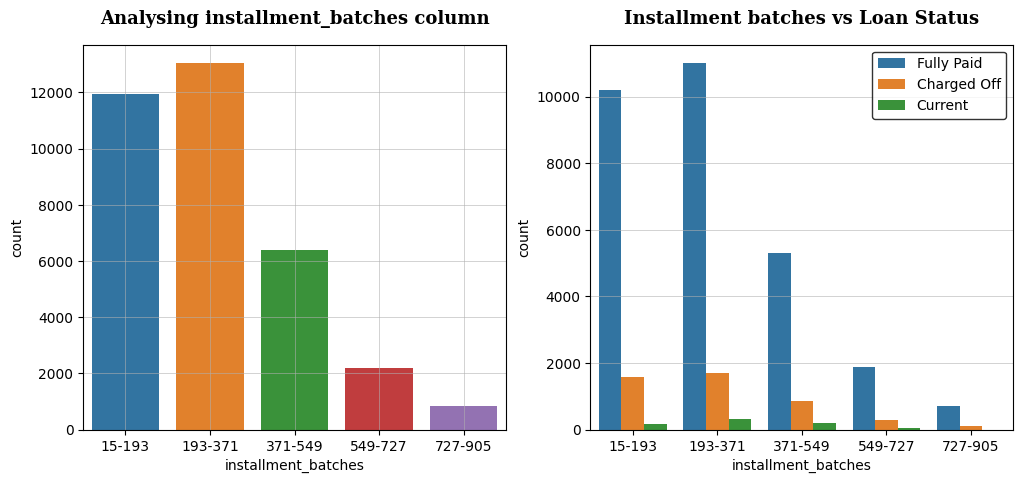

In [68]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


# Analysing installment_batches
sns.countplot(data=df, x='installment_batches', ax=ax[0]).grid(lw=.4)
ax[0].set_title('Analysing installment_batches column', fontsize=13, fontweight='bold', pad=15, fontname='serif')


# Analysing installment_batches vs loan_status:
ax[1].grid(lw=.4)
sns.countplot(data=df, x='installment_batches', hue='loan_status', ax=ax[1]).legend(frameon=True,edgecolor='black', facecolor='white')
ax[1].set_title('Installment batches vs Loan Status', fontsize=13, fontweight='bold', pad=15, fontname='serif')

plt.show()

Obsevation:
- From subplot 1 and 2, it shows that majority of borrowers have loan installments between 193 to 371 and the loan amount is fully paid.
- Also, Subplot 2 shows that compared to count of Fully paid, Defaulters count is very low.

In [69]:
# Converting numerical column 'annual_inc' into Categorical column by binning the column:

df['annual_inc_batches']= pd.cut(df.annual_inc, bins=5,
                                labels=['4000-26200', '26200-52400', '52400-78600', '78600-104800', '104800-131000'])

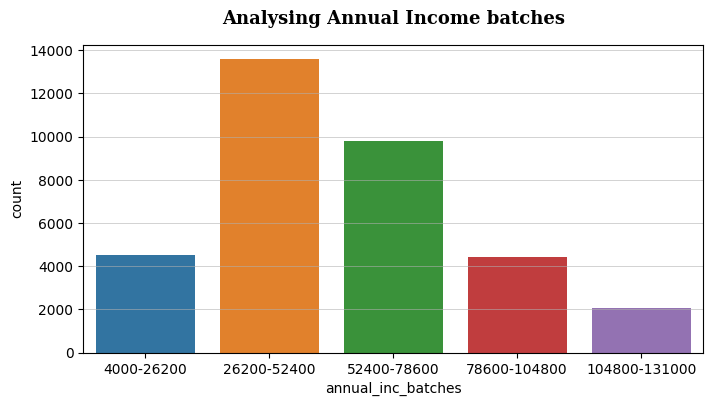

In [70]:
# Analysing annual_inc_batches:
plt.figure(figsize=(8,4))

sns.countplot(data=df, x='annual_inc_batches').grid(axis='y', lw=.4)
plt.title('Analysing Annual Income batches', fontsize=13, pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
- After binning Annual Income, the batch of borrower's having annual income between 26200 - 52400 is high.

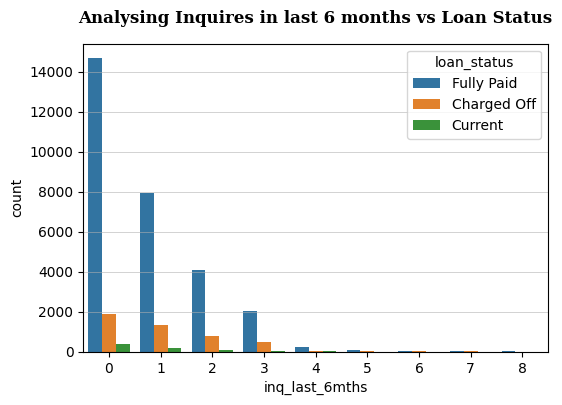

In [71]:
# Analysis of inq_last_6mths vs loan_status:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='inq_last_6mths', hue='loan_status').grid(lw=.4, axis='y')
plt.title('Analysing Inquires in last 6 months vs Loan Status', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
- The count for Fully paid is high for borrowers with 0 inquires from past 6 months.

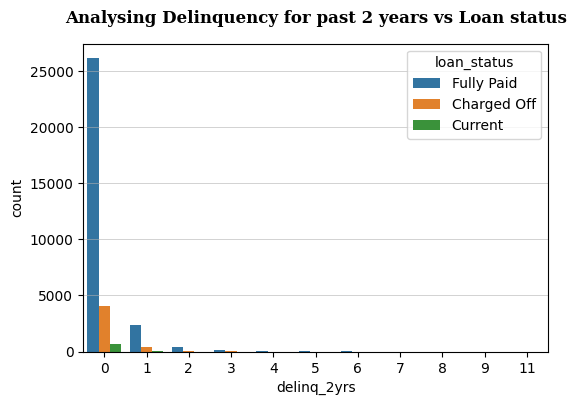

In [72]:
# Analysis of delinq_2yrs vs Loan_status
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='delinq_2yrs', hue='loan_status').grid(axis='y', lw=.4)
plt.title('Analysing Delinquency for past 2 years vs Loan status', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:
- From the above analysis, the borrower's having deliquency as 0 for past 2 years has higher chances of loan approval. Also the count of Fully Paid borrowers are more compared to the defaulter's count.

In [73]:
# Converting 'issue_d' i.e Loan issue date datatype from object to datetime:

df.issue_d = pd.to_datetime(df['issue_d'], format='%b-%y')
df.issue_d

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
39711   2007-07-01
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 34391, dtype: datetime64[ns]

In [74]:
# Creating columns 'month' and 'year' in the dataset containing values of month and year extracted from the issue date respectively

df['month'] = pd.DatetimeIndex(df['issue_d']).month
df['year'] = pd.DatetimeIndex(df['issue_d']).year

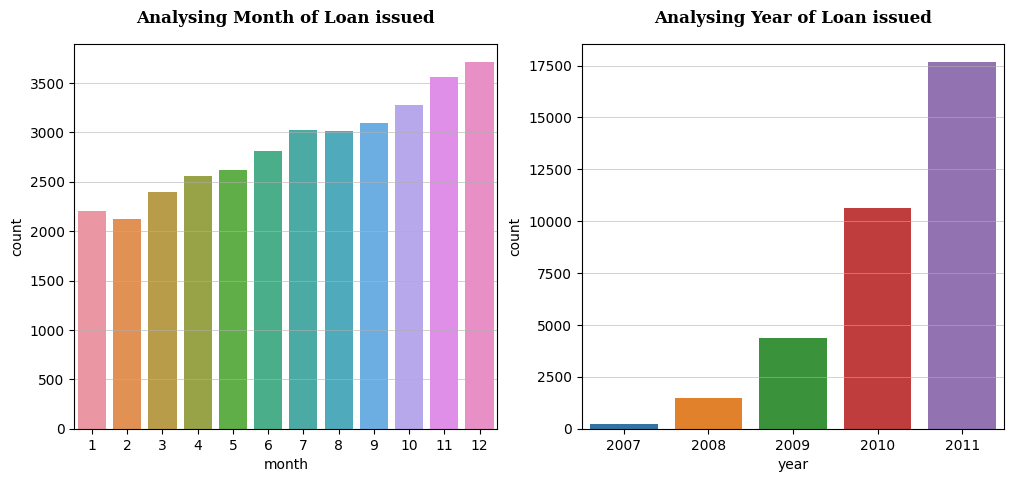

In [75]:
# Analysis on month and year column:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

# Subplot 1: Analysis of 'month' column
sns.countplot(data=df, x='month', ax=ax[0]).grid(axis='y', lw=.4)
ax[0].set_title('Analysing Month of Loan issued', pad=15, fontname='serif', fontweight='bold')

sns.countplot(data=df, x='year', ax=ax[1]).grid(axis='y', lw=.4)
ax[1].set_title('Analysing Year of Loan issued', pad=15, fontname='serif', fontweight='bold')

plt.show()

Observation:

- From the above analysis, the months November and December have higher number of loan issued largely in the year 2011.

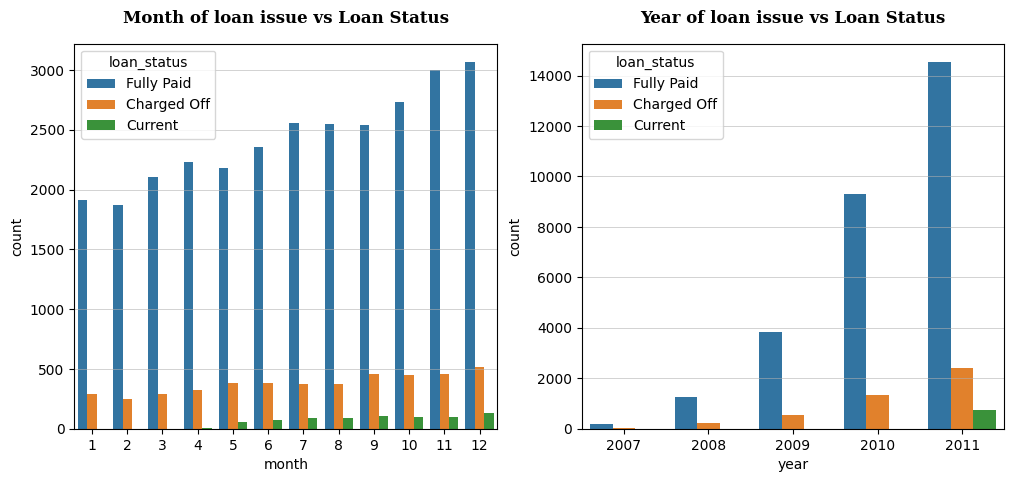

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,5))

# Analysis of month vs loan_status:
sns.countplot(data=df, x='month', hue='loan_status', ax=ax[0]).grid(axis='y', lw=.4)
ax[0].set_title('Month of loan issue vs Loan Status', fontname='serif', pad=15, fontweight='bold')

# Analysis of year vs loan_status:
sns.countplot(data=df, x='year', hue='loan_status', ax=ax[1]).grid(axis='y', lw=.4)
ax[1].set_title('Year of loan issue vs Loan Status', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observation:
- As the number of borrowers increases, the rate of Fully Paid and Defaulters both increases but the defaulters count is far less from the Fully paid count.

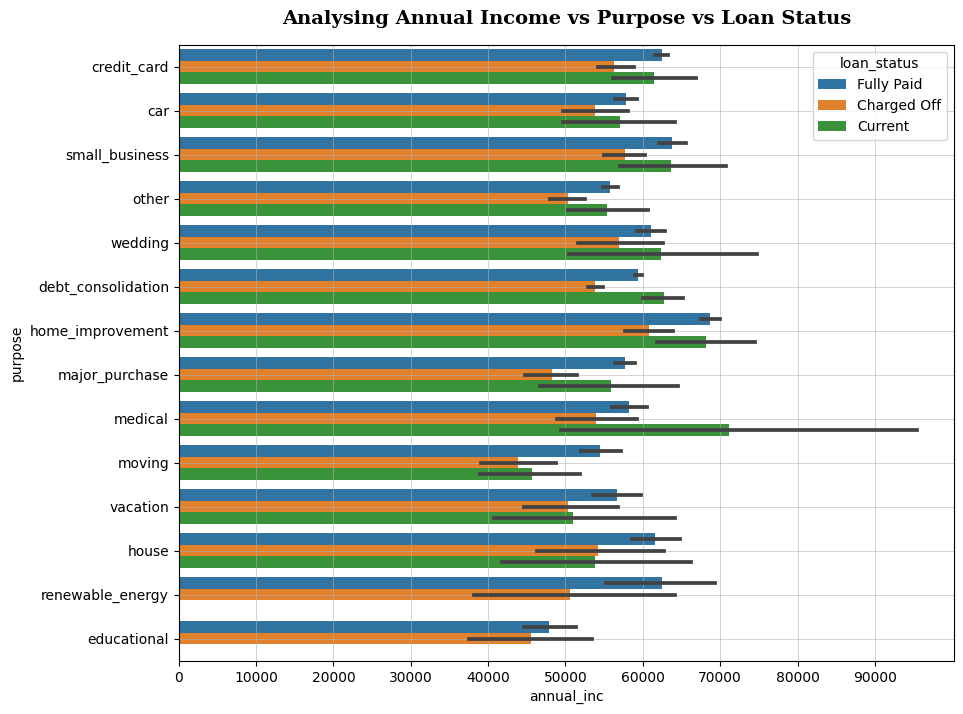

In [77]:
# Analysis of annual_inc vs purpose vs loan_status:
plt.figure(figsize=(10,8))

sns.barplot(data=df, x='annual_inc', y='purpose', hue='loan_status').grid(lw=.4)
plt.xticks(np.arange(0,100000,10000))
plt.title('Analysing Annual Income vs Purpose vs Loan Status', pad=15, fontname='serif', fontsize=14, fontweight='bold')

plt.show()

Observations:
- Loan taken for Home improvement have Fully Paid borrowers and defaulters with highest income ranging between 60000-70000.
- The loan for medical have highest borrowers currently paying the loan with highest income ranging from 70000-80000.


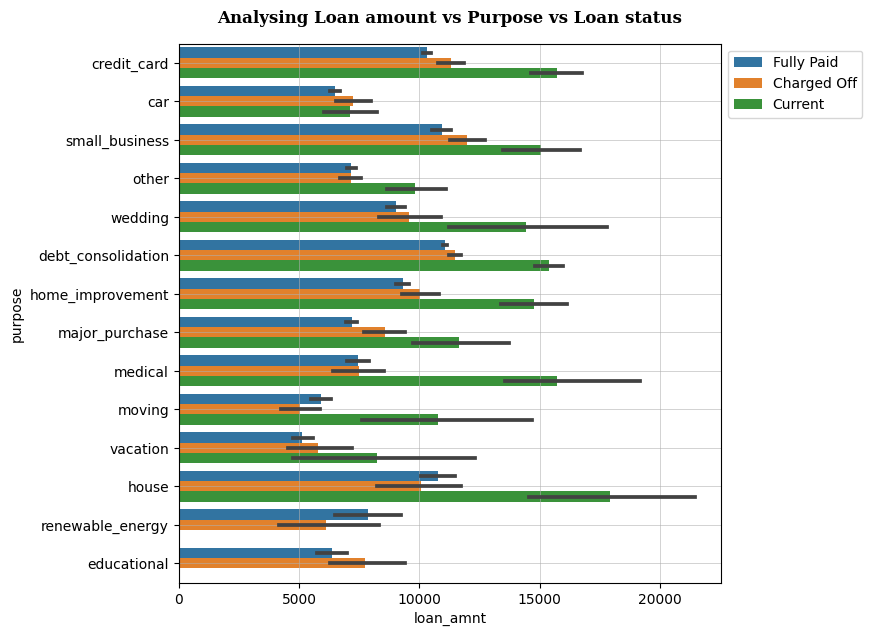

In [78]:
# Analysing Loan amount vs Purpose vs Loan status:
plt.figure(figsize=(7,7))

sns.barplot(data=df, x='loan_amnt', y='purpose', hue='loan_status').grid(lw=.4)
plt.title('Analysing Loan amount vs Purpose vs Loan status', pad=15, fontweight='bold', fontname='serif')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Observations:
- Loan for Credit card, Small business, Debt Consolidation and House have Fully paid borrowers with loan amount range 10000-12000.

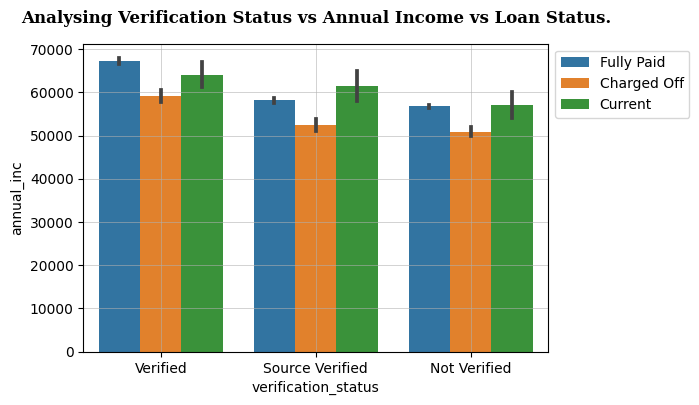

In [79]:
# Analysing Verification Status vs Annual Income vs Loan Status:
plt.figure(figsize=(6,4))

sns.barplot(data=df, x='verification_status', y='annual_inc', hue='loan_status').grid(lw=.4)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Analysing Verification Status vs Annual Income vs Loan Status.', pad=15, fontweight='bold', fontname='serif')

plt.show()

Observation:
- The borrowers with loan verified has highest annual income ranging between 60000-70000.
- While the borrowers with verification status as Source Verified and not verified have annual income of Fully Paid and Charged Off between 50000 - 60000.

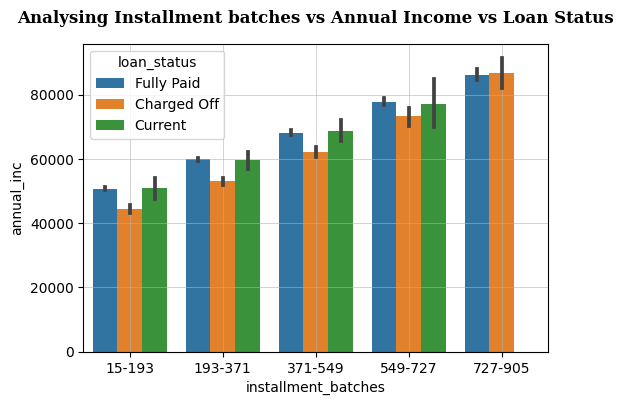

In [80]:
# Analysing Installment batches vs Annual Income vs Loan Status:
plt.figure(figsize=(6,4))

sns.barplot(data =df,x='installment_batches', y='annual_inc', hue ='loan_status').grid(lw=.4)
plt.title('Analysing Installment batches vs Annual Income vs Loan Status', pad=15, fontweight='bold', fontname='serif')

plt.show()

Observations:
- The installment batch 727-905 have borrowers of Fully Paid, Current and Charged Off highest income above 80000 while, Fully Paid, Current and Charged Off borrowers having installment batch 15-193 have  lowest income between 40000-60000.
- As the number of installments and annual income increases the count Fully Paid, Charged Off and Current borrowers also increases. So, if the number of installments and annual income is too high then there are chances of loan defaulting.

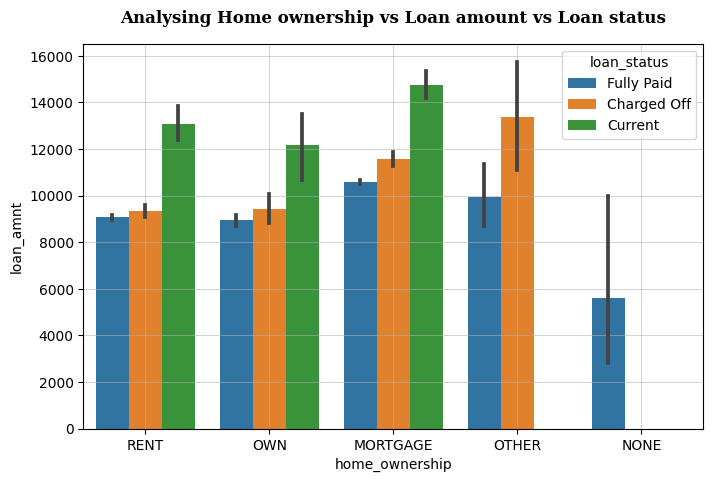

In [81]:
# Analysing Home ownership vs Loan amount vs Loan status:
plt.figure(figsize=(8,5))

sns.barplot(data=df, x='home_ownership', y='loan_amnt', hue='loan_status').grid(lw=.4)
plt.title('Analysing Home ownership vs Loan amount vs Loan status', pad=15, fontweight='bold', fontname='serif')

plt.show()

Observation:
 - From the above analysis it clearly states that high loan amount increases the loan default risk.
 - If the borrower has home ownership other than Rent, Owned or Mortgage and also if the loan amount is high there are high chances of loan defaulting.


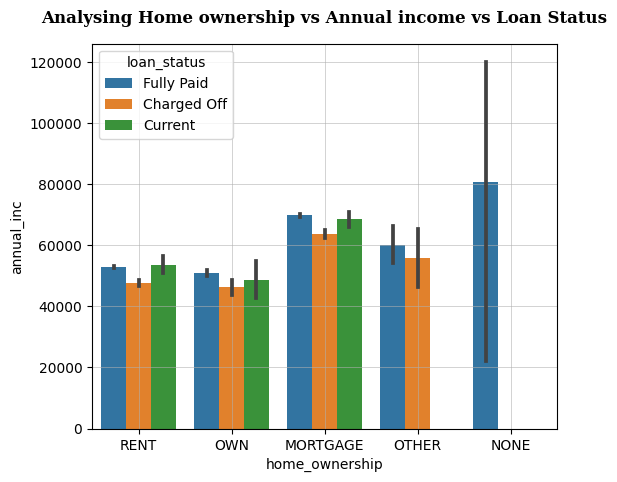

In [82]:
# Analysing Home ownership vs Annual income vs Loan Status:
plt.figure(figsize=(6,5))

sns.barplot(data=df, x='home_ownership', y='annual_inc', hue='loan_status').grid(lw=.4)
plt.title('Analysing Home ownership vs Annual income vs Loan Status', pad=15, fontweight='bold', fontname='serif')

plt.show()

Observations:
- Annual Income analysed with Home ownership shows that Fully Paid, Current and Defaulters fall into same annual income range.
- Fully Paid and Defaulter Borrowers having Home as Mortgage have high income of all i.e between 60000- 80000.

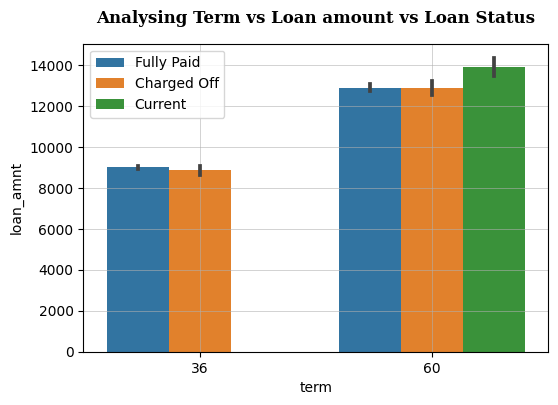

In [83]:
# Analysing Term vs Loan amount vs Loan Status:
plt.figure(figsize=(6,4))

sns.barplot(data=df, x='term', y='loan_amnt', hue='loan_status').grid(lw=.4)
plt.title('Analysing Term vs Loan amount vs Loan Status', pad=15, fontweight='bold', fontname='serif')
plt.legend(loc = 'upper left')

plt.show()

Observations:

- For lower loan amounts, i.e below 10000 the term is of 36 months.
- For higher loan amounts, i.e. till 14000 the term is of 60 months.
- The loan amount range for Fully Paid and Defaulters are same.

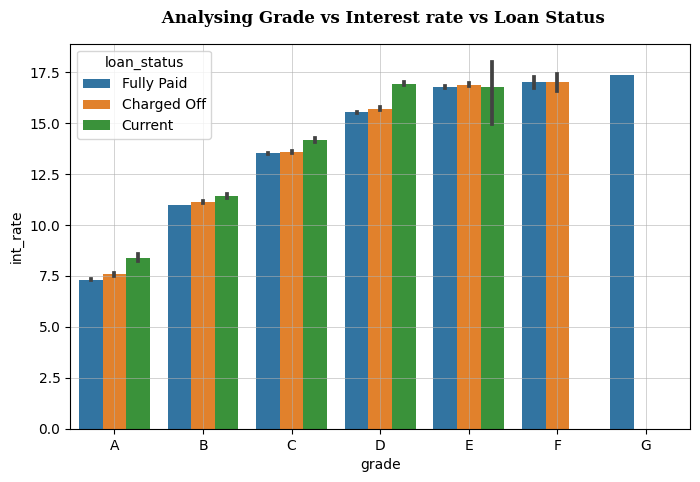

In [84]:
# Analysing Grade vs Interest rate vs Loan Status:
plt.figure(figsize=(8,5))

sns.barplot(data=df, x='grade', y='int_rate', hue='loan_status',order=['A','B','C','D','E','F','G']).grid(lw=.4)
plt.title(' Analysing Grade vs Interest rate vs Loan Status', fontname='serif', pad=15, fontweight='bold')

plt.show()

Observation:
- As the Grade moves from A to G, the interest rate increases.
- The range of interest rate is the same for Fully Paid and Defaulters of the same grade.

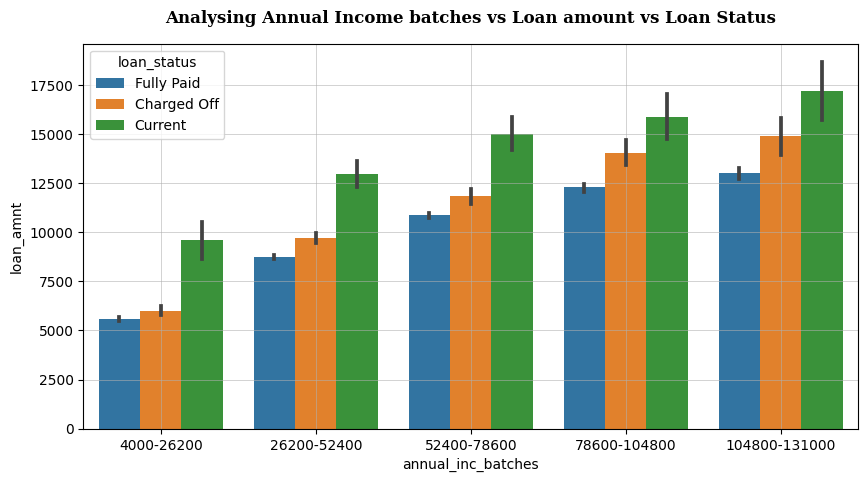

In [85]:
# Analysing Annual Income batches vs Loan amount vs Loan Status:
plt.figure(figsize=(10,5))

sns.barplot(data=df, x='annual_inc_batches', y='loan_amnt', hue='loan_status').grid(lw=.4)
plt.title('Analysing Annual Income batches vs Loan amount vs Loan Status', pad=15, fontweight='bold', fontname='serif')

plt.show()

Observations:
- As the Annual income increases with respect to Loan amount, the count of Fully Paid and Charged Off increases, but here the count of Charged off is more than Fully Paid.
- The loan amount for Current borrowers has higher loan amount.
- Loan amount for Charged Off is higher than that of Fully Paid.

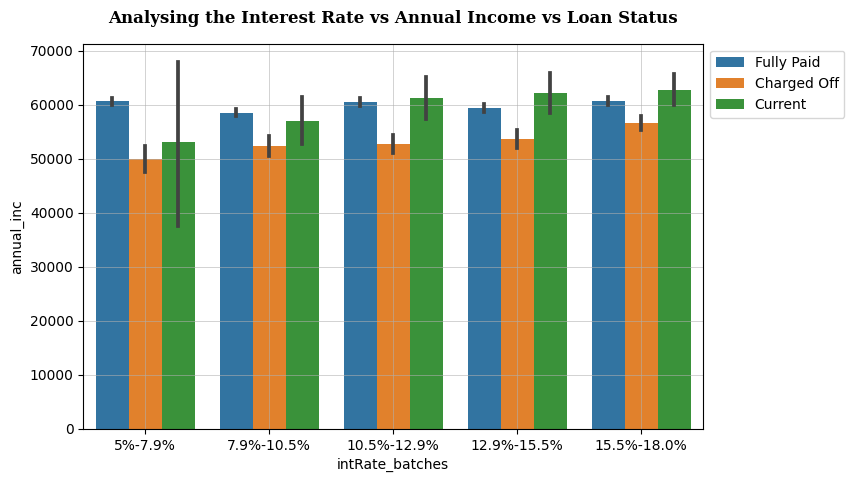

In [86]:
# Analysing the Interest Rate vs Annual Income vs Loan Status:
plt.figure(figsize=(8,5))

sns.barplot(data=df, x='intRate_batches', y='annual_inc', hue='loan_status').grid(lw=.4)
plt.title('Analysing the Interest Rate vs Annual Income vs Loan Status', pad=15, fontweight='bold', fontname='serif')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Observations:
- The Charged Off count is significantly lower than Fully Paid and Current active loans.
- The annual income range for borrowers who have fully paid their loans lies between 55000 and 65000 for all interest rate groups.
- The annual income range for borrowers who have Charged Off loans is between 50000 and 60000 for all interest rate groups.

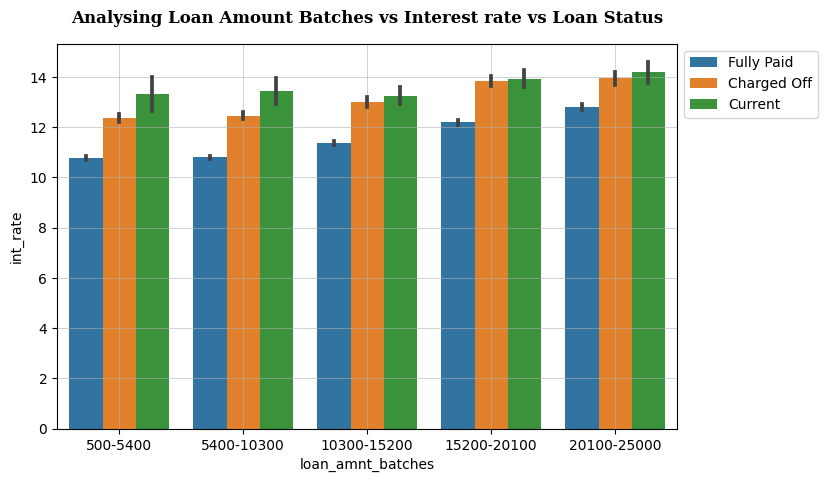

In [87]:
# Analysing Loan Amount Batches vs Interest rate vs Loan Status:
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x='loan_amnt_batches', y='int_rate', hue='loan_status').grid(lw=.4)
plt.title('Analysing Loan Amount Batches vs Interest rate vs Loan Status', pad=15, fontweight='bold', fontname='serif')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Observations:
- The interest rate offered to Fully Paid borrowers is lower than that of Charged Off borrowers.
- As the loan amount increases, the interest rate also increases, but Charged Off Loans have a high interest rate compared to Fully Paid Loans.
- So, if the interest rate is too high compared to the annual income of the borrower, there is a higher possibility of the loan becoming default.

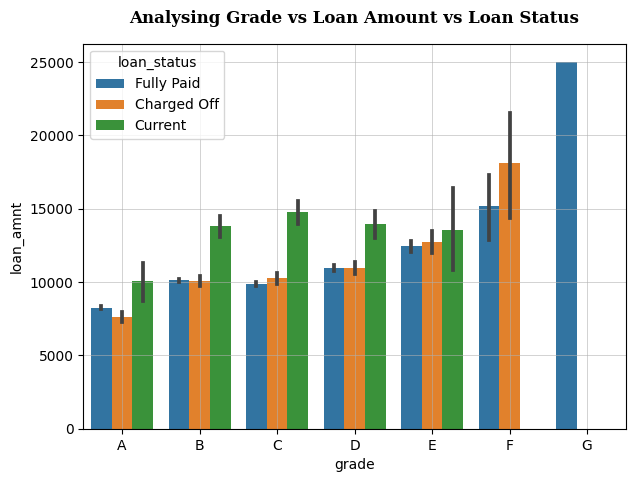

In [88]:
# Analysing Grade vs Loan Amount vs Loan Status:
plt.figure(figsize=(7,5))

sns.barplot(data=df, x='grade', y='loan_amnt', hue='loan_status', order=['A','B','C','D','E','F','G']).grid(lw=.4)
plt.title('Analysing Grade vs Loan Amount vs Loan Status', pad=15, fontweight='bold', fontname='serif')

plt.show()

Observation:
- As we move from grade A to grade G the loan amount also increases for each grade.
- The loan amount for Fully Paid and Charged Off Borrower lies in the same range for each grade except for grades F and G.
- According to the above plot, the borrowers of grade F have a higher chance of defaulting when compared to other grade.
- Grade G has only Fully Paid borrowers with the highest loan amount range, which extends up to 25000.

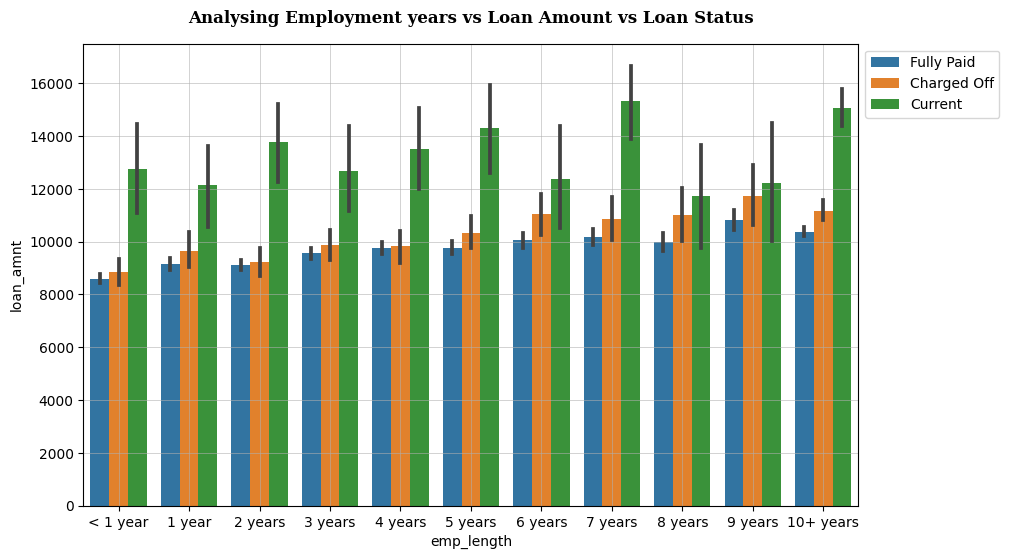

In [89]:
# Analysing Employent Length vs Loan Amount vs Loan Status:
plt.figure(figsize=(10,6))

sns.barplot(data=df, x='emp_length', y='loan_amnt', hue='loan_status',
            order=['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years','9 years','10+ years']).grid(lw=.4)
plt.title('Analysing Employment years vs Loan Amount vs Loan Status', pad=15, fontweight='bold', fontname='serif')
plt.legend(bbox_to_anchor=(1,1))

plt.show()

Observation:
- According to the plot, as Employment years increase, the loan amount also increases, which also rises the risk of defaulter.
- The Employment years from 6-9 years have a higher risk of loan defaulting.
- The borrowers with currently active loans are more in count as compared to those who have either Fully paid their loans or Charged off.

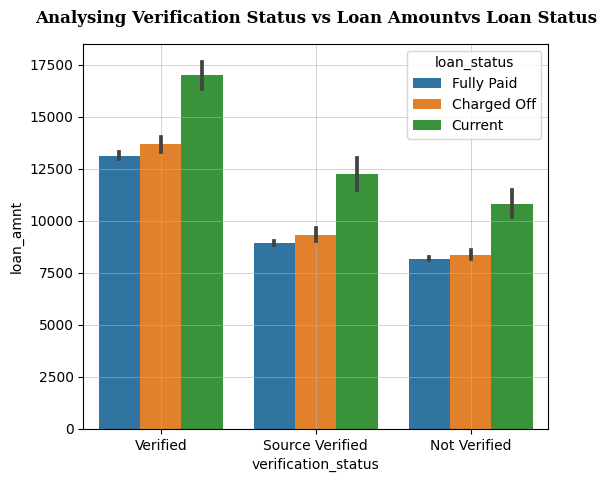

In [90]:
# Analysing Verification Status vs Loan Amount Loan Status:
plt.figure(figsize=(6,5))

sns.barplot(data=df, x='verification_status', y='loan_amnt', hue='loan_status').grid(lw=.4)
plt.title('Analysing Verification Status vs Loan Amountvs Loan Status', pad=15, fontweight='bold', fontname='serif')
# plt.legend(bbox_to_anchor=(1,1))

plt.show()

Observation:
- As per the plot, it can be observed that the loan amount range for Fully Paid and Charged Off borrowers is similar however the Charged Off borrowers have a slightly higher loan amount
- Borrowers with unverified loans have a higher risk of loan defaulting.

## Recommendations:

- Loans of grade A or B have a low risk of default.
- Loan of grade A or B with a term of 36 months will reduce the risk of defaulters.
- Applicants who have worked for 10 years or more are less likely to default, while those with 6-9 years of employment have a higher risk.
- As the interest rate on a loan increases, the possibility of the loan being defaulted on also increases.
- The dti i.e. debt-to-income ratio between 16-18 can reduce the risk of default.
-  Loans with low interest rates, grade of A or B, and loan amounts within a certain range, can also reduce the risk of default.
- A high number of installments increases the risk of default.
- Loans issued in October, November and December are more likely to default.
- Loans for Credit cards, Small businesses, Debt Consolidation and Houses have a low possibility to be default.
- Annual income and a verified loan source decrease the chance of to loan to be default.
-  As installments increase relative to annual income, the risk of default also increases.
- Loan applicants without home ownership and with high loan amounts are more likely to default.
- Loan amount and interest rate were high for the borrower who has charged off. So, the loan amount and interest rate should be determined based on their annual income, loan grade and other aspects.